# LIS '16 &ndash; Python tutorial

In [52]:
%matplotlib inline
from __future__ import print_function

## Matrix operations, plotting, and linear regression

In [53]:
# Provides Matlab-style matrix operations
import numpy as np
# Provides Matlab-style plotting
import matplotlib.pylab as plt

### Vectors and matrices in ```NumPy```

In [54]:
x = np.array([1, -1])
A = np.array([
    [1, 2],
    [3, 4],
    [5, 6]])
print('x = ', x)
print('A = \n', A)

x =  [ 1 -1]
A = 
 [[1 2]
 [3 4]
 [5 6]]


The shape is (rows, cols)

In [55]:
print('Shape of A:', A.shape)

Shape of A: (3, 2)


We can easily scale the matrix, or add a constant to it.

In [56]:
print('5*A = \n', 5*A)
print('2 + A = \n', 2 + A)

5*A = 
 [[ 5 10]
 [15 20]
 [25 30]]
2 + A = 
 [[3 4]
 [5 6]
 [7 8]]


All other binary operations are also element-wise.

In [57]:
print('A**2=\n', A**2)

A**2=
 [[ 1  4]
 [ 9 16]
 [25 36]]


We can take the transpose as follows.

In [58]:
print('Transpose of A:\n', A.T)

Transpose of A:
 [[1 3 5]
 [2 4 6]]


You can multiply matrices and vectors.

In [59]:
print('A*x=\n', A.dot(x))

A*x=
 [-1 -1 -1]


The multiplication operator performs element-wise multiplication.

In [60]:
B = np.array([
    [1, -1],
    [2, -2],
    [3, -3]])
print('A*B\n', A*B)

A*B
 [[  1  -2]
 [  6  -8]
 [ 15 -18]]


Be careful with slicing!

In [61]:
T = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(T[[1, 2], [0, 1]])

[4 8]


In [62]:
print(T[[[1], [2]], [0, 1]])

[[4 5]
 [7 8]]


In [63]:
print(T[[1, 2]][:, [0, 1]])

[[4 5]
 [7 8]]


We can compute the SVD as follows.

In [64]:
U, S, V = np.linalg.svd(A)
print('Singular values of A:', S)

Singular values of A: [ 9.52551809  0.51430058]


We can solve a linear system as follows.

In [65]:
C = np.array([
        [1, 2],
        [4, 5]])
print('Solution of linear system:', np.linalg.solve(C, np.array([3, 4])))

Solution of linear system: [-2.33333333  2.66666667]


For over-determined system, we have to solve least squares problem. The function lstsq returns also some other values (see documentation).

In [66]:
x  = np.linalg.lstsq(B, np.array([3, 4, 1]))[0]
print('Least squares solution:', x)

Least squares solution: [ -2.42039096e+15  -2.42039096e+15]


### Plotting

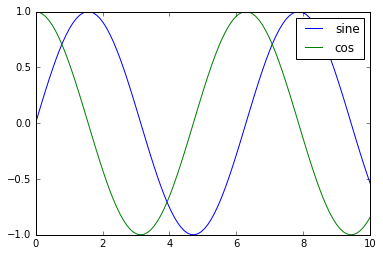

In [67]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), label='sine')
plt.plot(x, np.cos(x), label='cos')
plt.legend();

### Sampling

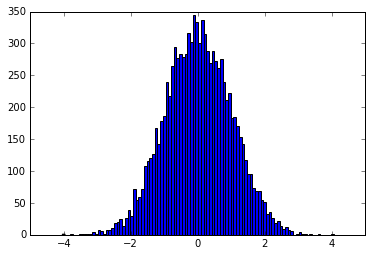

In [68]:
plt.hist(np.random.randn(10000), bins=100);

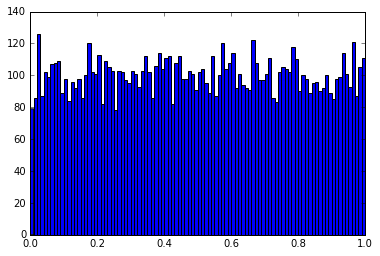

In [69]:
plt.hist(np.random.rand(10000), bins=100);

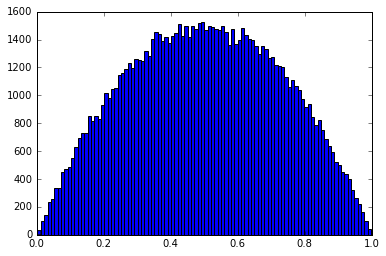

In [70]:
plt.hist(np.random.beta(2, 2, 100000), bins=100);

### Two-dimensional Gaussians

In [71]:
def plot_2d_gaussian(H):
    plt.figure(figsize=(4,4)) # Square plot aspect ratio.
    H = np.linalg.inv(H)
    x, y = np.meshgrid(np.linspace(-5, 5, 300), np.linspace(-5, 5, 300))
    plt.contour(x, y, np.exp(-0.5 * (x**2*H[0, 0] + y**2*H[1, 1] + 2*x*y*H[0, 1])))
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    
    
def plot_samples(H):
    L = np.linalg.cholesky(H)
    samples = L.dot(np.random.randn(2, 100))
    plt.plot(samples[0, :], samples[1, :], 'rx')

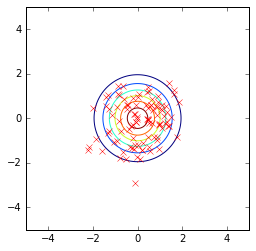

In [72]:
plot_2d_gaussian(np.eye(2))
plot_samples(np.eye(2))

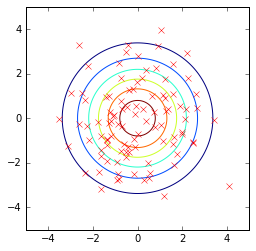

In [73]:
plot_2d_gaussian(3*np.eye(2))
plot_samples(3*np.eye(2))

eigen values: [ 3.  1.]
eigen vectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


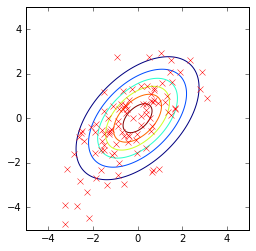

In [74]:
C = np.array([[2, 1], [1, 2]])
plot_2d_gaussian(np.matrix(C))
plot_samples(np.matrix(C))
eigvals, eigvecs = np.linalg.eig(C)
print('eigen values:', eigvals)
print('eigen vectors:\n', eigvecs)

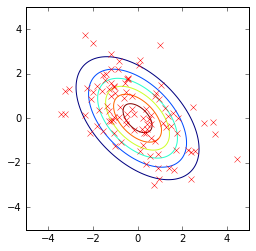

In [75]:
plot_2d_gaussian(np.matrix([[2, -1], [-1, 2]]))
plot_samples(np.matrix([[2, -1], [-1, 2]]))

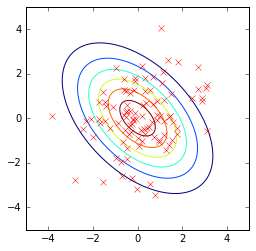

In [76]:
plot_2d_gaussian(np.matrix([[2, -1], [0.5, 2]]))
plot_samples(np.matrix([[2, -1], [0.5, 2]]))

### Linear regression

Generate a linear data set corrupted by noise.

X shape: (30, 1)
Y shape: (30, 1)


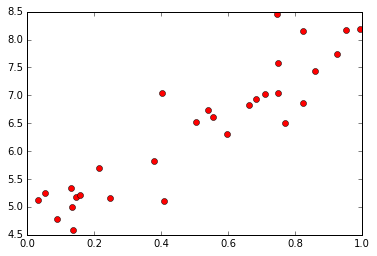

In [77]:
X = np.random.rand(30, 1)
Y = 3*X + 5 + 0.5*np.random.randn(30, 1)
print('X shape:', X.shape)
print('Y shape:', Y.shape)
plt.plot(X, Y, 'ro')

In [78]:
X_mod = np.hstack((X, np.ones((30, 1))))
print('X_mod shape:', X_mod.shape)
print('Y shape:', Y.shape)

X_mod shape: (30, 2)
Y shape: (30, 1)


slope [ 3.43808859] intercept [ 4.6737675]


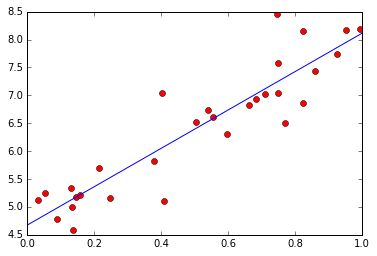

In [79]:
w = np.linalg.solve(X_mod.T.dot(X_mod), X_mod.T.dot(Y))
print('slope', w[0], 'intercept', w[1])
x_lin = np.linspace(0, 1, 100)
plt.plot(X, Y, 'ro')
plt.plot(x_lin, w[0]*x_lin + w[1], 'b-');

## Project 1: Regression

In the following, we use scikit-learn (http://scikit-learn.org/), a Python library which provides a lot of functionality related to Machine Learning (regression, classification, cross-validation, etc.).

In [80]:
# Contains linear models, e.g., linear regression, ridge regression, LASSO, etc.
import sklearn.linear_model as sklin
# Allows us to create custom scoring functions
import sklearn.metrics as skmet
# Provides train-test split, cross-validation, etc.
import sklearn.cross_validation as skcv
# Provides grid search functionality
import sklearn.grid_search as skgs
# The dataset we will use
from sklearn.datasets import load_boston
# For data normalization
import sklearn.preprocessing as skpr

### Example data set

In [81]:
boston = load_boston()
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [82]:
feature_names = boston['feature_names']
def get_features(features):
   return np.hstack((features,))
X = get_features(boston.data)
Y = boston.target
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)
# We can also (optionally) normalize the data
X = skpr.scale(X)

Shape of X: (506, 13)
Shape of Y: (506,)


### Data split

Now, we need to split our data into a train and a test set.

In [83]:
Xtrain, Xtest, Ytrain, Ytest = skcv.train_test_split(X, Y, train_size=0.75)
print('Shape of Xtrain:', Xtrain.shape)
print('Shape of Ytrain:', Ytrain.shape)
print('Shape of Xtest:', Xtest.shape)
print('Shape of Ytest:', Ytest.shape)

Shape of Xtrain: (379, 13)
Shape of Ytrain: (379,)
Shape of Xtest: (127, 13)
Shape of Ytest: (127,)


### Correlations of the variables with the prediction

In [84]:
XYtrain = np.vstack((Xtrain.T, np.atleast_2d(Ytrain)))
correlations = np.corrcoef(XYtrain)[-1, :]
print('features', len(feature_names), 'correlations', len(correlations))
for feature_name, correlation in zip(feature_names, correlations):
    print('{0:>10} {1:+.4f}'.format(feature_name, correlation))
print('{0:>10} {1:+.4f}'.format('OUTPUT', correlations[-1]))

features 13 correlations 14
      CRIM -0.3802
        ZN +0.3636
     INDUS -0.5167
      CHAS +0.1191
       NOX -0.4379
        RM +0.6916
       AGE -0.4000
       DIS +0.2740
       RAD -0.3779
       TAX -0.4740
   PTRATIO -0.4806
         B +0.3468
     LSTAT -0.7274
    OUTPUT +1.0000


### Training

We are ready to train a linear regressor on our training set.

In [85]:
regressor = sklin.LinearRegression()
regressor.fit(Xtrain, Ytrain)
print('{0:>10} {1:+.4f}'.format('intercept', regressor.intercept_))
for feature_name, coef in zip(feature_names, regressor.coef_):
    print('{0:>10} {1:+.4f}'.format(feature_name, coef))

 intercept +22.4402
      CRIM -1.1119
        ZN +1.1521
     INDUS +0.0312
      CHAS +0.4564
       NOX -1.8296
        RM +2.9269
       AGE -0.3794
       DIS -3.1334
       RAD +2.9593
       TAX -2.3956
   PTRATIO -2.0349
         B +0.9132
     LSTAT -3.2909


### Testing

We use the following scoring function to estimate the perfomance of our regressor on the test set. The function thesholds any negative prediction to zero, and computes the MSE of the logarithms of our predictions.

In [86]:
def score(gtruth, pred):
    diff = gtruth - pred
    return np.sqrt(np.mean(np.square(diff)))


Ypred = regressor.predict(Xtest)
print('score =', score(Ytest, Ypred))

score = 4.93370765551


### Cross-validation

Instead of splitting once into training and testing set, we can use cross-validation to perform multiple splits, and also obtain a variance estimate of our generalization score.

In [87]:
scorefun = skmet.make_scorer(score)
scores = skcv.cross_val_score(regressor, X, Y, scoring=scorefun, cv=5)
print('C-V score =', np.mean(scores), '+/-', np.std(scores))

C-V score = 5.83643122652 +/- 1.77733344513


### Grid search

In [88]:
regressor_ridge = sklin.Ridge()
param_grid = {'alpha': np.linspace(0, 100, 10)}
neg_scorefun = skmet.make_scorer(lambda x, y: -score(x, y))  # Note the negative sign.
grid_search = skgs.GridSearchCV(regressor_ridge, param_grid, scoring=neg_scorefun, cv=5)
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([   0.     ,   11.11111,   22.22222,   33.33333,   44.44444,
         55.55556,   66.66667,   77.77778,   88.88889,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=make_scorer(<lambda>),
       verbose=0)

Let us look at the best estimator found.

In [89]:
best = grid_search.best_estimator_
print(best)
print('best score =', -grid_search.best_score_)

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
best score = 4.78213628603


### Output result to file

Now, we can predict the output of the validation data and write it to a file.

In [90]:
Ypred = best.predict(Xtest)
np.savetxt('result_validate.txt', Ypred)

### Stochastic gradient descent vs gradient descent

In [91]:
n_points = 100
points = np.random.randn(n_points, 2) + 10
x_true = np.mean(points, axis=0).ravel()
print('x_true', x_true)

x_true [ 9.9361688   9.93170226]


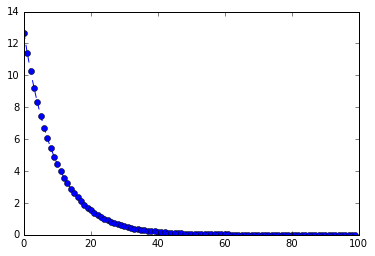

In [92]:
x = np.random.randn(2)
step_size = 0.1
errors = []
for iteration in range(100):
    point = np.mean(points, axis=0).ravel()
    # point = points[np.random.randint(n_points), :].ravel()
    x -= step_size * (x - point)
    errors.append(np.linalg.norm(x - x_true))
plt.plot(errors, 'o--');

Let us now do use SGD for regression

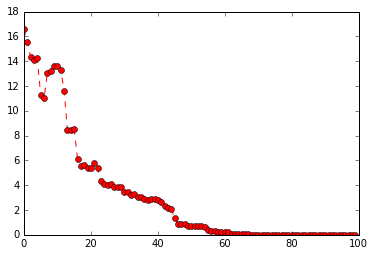

In [93]:
dim = 10
step_size = 0.1
X = np.random.randn(n_points, dim)
w_truth = np.random.randn(dim)
y = X.dot(w_truth).ravel() + 0.001 * np.random.randn(n_points)
errors = []
w = np.random.randn(dim)
for iteration in range(100):
    idx = np.random.randint(n_points)
    point = X[idx, :].ravel()
    w -= step_size * (w.dot(point) - y[idx]) * point
    errors.append(np.mean(np.square(X.dot(w)-y)))
plt.plot(errors, 'ro--');